In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

--2021-07-29 09:34:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   129MB/s    in 0.8s    

2021-07-29 09:34:03 (129 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [ ]:
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls pizza_steak


test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [ ]:
import os 
for dirpath,dirnames, filenames in os.walk("pizza_steak"):
   print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 1 images in pizza_steak
there are 2 directories and 1 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/pizza
there are 0 directories and 250 images in pizza_steak/test/steak
there are 2 directories and 1 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/pizza
there are 0 directories and 750 images in pizza_steak/train/steak


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape: {img.shape}")
  return img

image shape: (512, 512, 3)


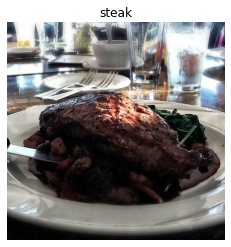

In [ ]:
 img = view_random_image(target_dir="pizza_steak/train/",
                         target_class = "steak")
 

In [ ]:
import tensorflow as tf 
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[65, 75, 87],
        [63, 73, 83],
        [61, 71, 81],
        ...,
        [47, 65, 87],
        [46, 64, 86],
        [54, 72, 94]],

       [[65, 75, 87],
        [63, 73, 85],
        [61, 71, 81],
        ...,
        [48, 66, 88],
        [49, 67, 89],
        [52, 70, 92]],

       [[65, 75, 87],
        [64, 74, 86],
        [61, 71, 81],
        ...,
        [52, 70, 92],
        [53, 71, 93],
        [51, 69, 91]],

       ...,

       [[ 5,  5,  3],
        [ 3,  3,  1],
        [ 1,  1,  0],
        ...,
        [13, 14,  9],
        [14, 15, 10],
        [13, 14,  9]],

       [[ 6,  6,  4],
        [ 3,  3,  1],
        [ 1,  1,  0],
        ...,
        [12, 13,  8],
        [12, 13,  8],
        [ 9, 10,  5]],

       [[ 4,  4,  2],
        [ 2,  2,  0],
        [ 0,  0,  0],
        ...,
        [11, 12,  7],
        [11, 12,  7],
        [ 7,  8,  3]]], dtype=uint8)>

In [ ]:
img.shape

(512, 512, 3)

In [ ]:
 from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed = 42

#normalisation
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir =  "/content/pizza_steak/test"
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
#Tiny vgg arc
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                               kernel_size=3,
                                                               activation="relu",
                                                               input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation="sigmoid") 



])
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
#fit the model
history_1=model_1.fit(train_data,epochs=5,
                      steps_per_epoch=(len(train_data)),
                      validation_data = valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 102s 2s/step - loss: 0.5762 - accuracy: 0.7040 - val_loss: 0.4165 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 100s 2s/step - loss: 0.4253 - accuracy: 0.8127 - val_loss: 0.3810 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 100s 2s/step - loss: 0.4027 - accuracy: 0.8280 - val_loss: 0.4872 - val_accuracy: 0.7420
Epoch 4/5
47/47 [==============================] - 100s 2s/step - loss: 0.3833 - accuracy: 0.8320 - val_loss: 0.3482 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 100s 2s/step - loss: 0.3467 - accuracy: 0.8493 - val_loss: 0.3114 - val_accuracy: 0.8720


In [ ]:
# simple model let check tf playgrond
tf.random.set_seed= 42
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3) ),
                               tf.keras.layers.Dense(4,activation = "relu"),
                               tf.keras.layers.Dense(4, activation= "relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 11s 234ms/step - loss: 0.6934 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 228ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.6932 - accuracy: 0.4787 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 227ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed=42

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(100,activation="relu"),
                               tf.keras.layers.Dense(1,activation="sigmoid")
])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 296ms/step - loss: 4.1509 - accuracy: 0.5940 - val_loss: 1.4798 - val_accuracy: 0.5960
Epoch 2/5
47/47 [==============================] - 14s 292ms/step - loss: 0.7395 - accuracy: 0.7060 - val_loss: 0.4992 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 14s 291ms/step - loss: 0.5714 - accuracy: 0.7427 - val_loss: 0.4430 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 14s 291ms/step - loss: 0.5339 - accuracy: 0.7587 - val_loss: 0.4246 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 14s 292ms/step - loss: 0.4684 - accuracy: 0.7873 - val_loss: 0.6555 - val_accuracy: 0.6980


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


image shape: (382, 512, 3)
image shape: (384, 512, 3)


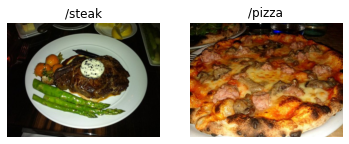

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train","/steak")
plt.subplot(1,2,2)
steak_img = view_random_image("pizza_steak/train","/pizza")

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(244,244),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D, Activation
from tensorflow.keras import Sequential


In [ ]:
model_4 = Sequential([
                       Conv2D(filters=10,
                              kernel_size = 3,
                              strides=1,
                              padding="valid",
                              activation="relu",
                              input_shape=(244,244,3)),
                       Conv2D(10,3,activation="relu"),
                       Conv2D(10,3,activation="relu"),
                       Flatten(),
                       Dense(1,activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 138s 3s/step - loss: 1.2331 - accuracy: 0.6827 - val_loss: 0.4283 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 144s 3s/step - loss: 0.4299 - accuracy: 0.8033 - val_loss: 0.4984 - val_accuracy: 0.7500
Epoch 3/5
47/47 [==============================] - 144s 3s/step - loss: 0.3543 - accuracy: 0.8613 - val_loss: 0.3732 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 144s 3s/step - loss: 0.2407 - accuracy: 0.9067 - val_loss: 0.3591 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 144s 3s/step - loss: 0.1026 - accuracy: 0.9733 - val_loss: 0.3618 - val_accuracy: 0.8420


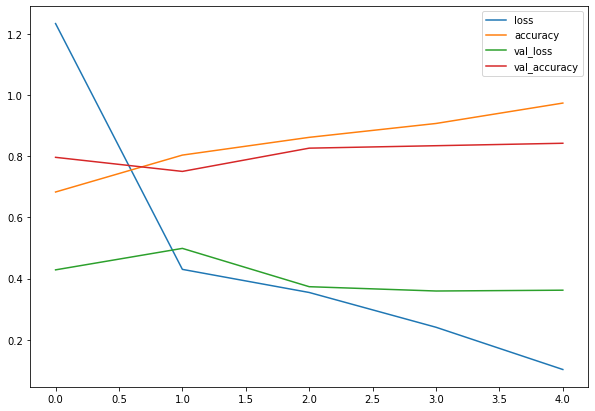

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));


In [18]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history["loss"]))
  plt.plot(epochs, loss , label = 'training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy, label='training_accuracy')
  plt.plot(epochs,val_accuracy, label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();

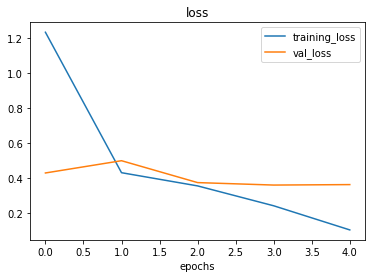

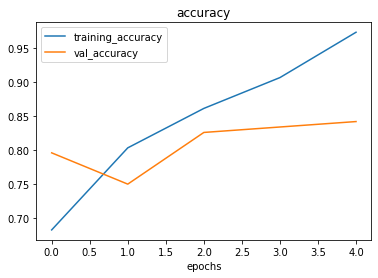

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 242, 242, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 240, 240, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 238, 238, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 566440)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 566441    
Total params: 568,541
Trainable params: 568,541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(244, 244, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 63s 1s/step - loss: 0.6158 - accuracy: 0.6913 - val_loss: 0.4505 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 60s 1s/step - loss: 0.4564 - accuracy: 0.7967 - val_loss: 0.4514 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 60s 1s/step - loss: 0.4159 - accuracy: 0.8173 - val_loss: 0.3728 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 60s 1s/step - loss: 0.3983 - accuracy: 0.8160 - val_loss: 0.3234 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 60s 1s/step - loss: 0.4179 - accuracy: 0.8080 - val_loss: 0.3281 - val_accuracy: 0.8840


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 242, 242, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 121, 121, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 119, 119, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 59, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 57, 57, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7840)             

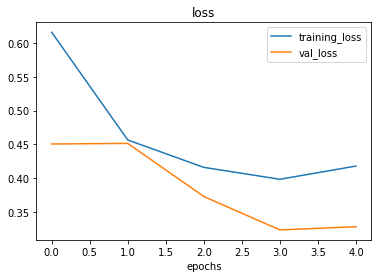

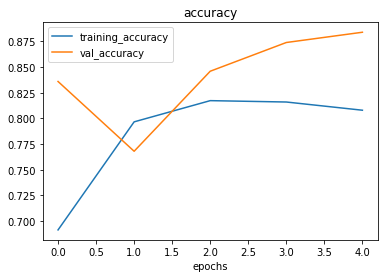

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1/255.)
teat_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#augmented training data
print("augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
print("nonaugmeted training data ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

augmented training data
Found 1500 images belonging to 2 classes.
nonaugmeted training data 
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

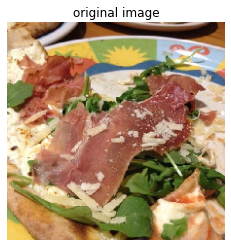

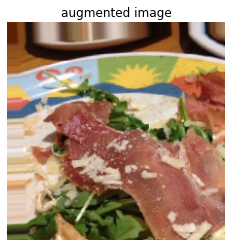

In [ ]:
random_number = random.randint(0,32)

plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'augmented image')
plt.axis(False);

In [ ]:
model_6 = Sequential([
                      Conv2D(10,3, activation='relu',input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

In [ ]:
model_6.compile(loss = 'binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 68s 1s/step - loss: 0.7260 - accuracy: 0.5073 - val_loss: 0.6717 - val_accuracy: 0.5140
Epoch 2/5
47/47 [==============================] - 67s 1s/step - loss: 0.6987 - accuracy: 0.5787 - val_loss: 0.6541 - val_accuracy: 0.6560
Epoch 3/5
47/47 [==============================] - 67s 1s/step - loss: 0.7120 - accuracy: 0.5507 - val_loss: 0.6728 - val_accuracy: 0.6940
Epoch 4/5
47/47 [==============================] - 67s 1s/step - loss: 0.6850 - accuracy: 0.6240 - val_loss: 0.6586 - val_accuracy: 0.6520
Epoch 5/5
47/47 [==============================] - 67s 1s/step - loss: 0.6738 - accuracy: 0.6433 - val_loss: 0.6147 - val_accuracy: 0.6840


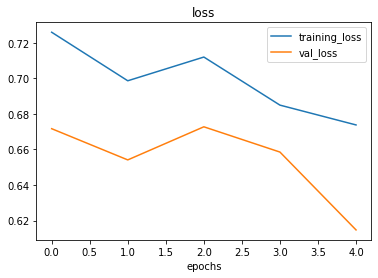

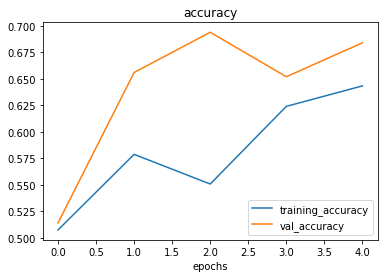

In [ ]:
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffeled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=True )

Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
                      Conv2D(10,3,activation='relu',
                             input_shape=(224,224,3)),
                      MaxPool2D(),
                      Conv2D(10,3,activation="relu"),
                      MaxPool2D(),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')                  
])
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["accuracy"])
history_7 = model_7.fit(train_data_augmented_shuffeled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffeled),
                        validation_data=test_data,
                        validation_steps=len(test_data)) 

Epoch 1/5
47/47 [==============================] - 68s 1s/step - loss: 0.6714 - accuracy: 0.5907 - val_loss: 0.5803 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 67s 1s/step - loss: 0.5396 - accuracy: 0.7307 - val_loss: 0.3905 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 67s 1s/step - loss: 0.4969 - accuracy: 0.7673 - val_loss: 0.4147 - val_accuracy: 0.8140
Epoch 4/5
47/47 [==============================] - 67s 1s/step - loss: 0.4809 - accuracy: 0.7727 - val_loss: 0.3655 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 67s 1s/step - loss: 0.4790 - accuracy: 0.7787 - val_loss: 0.4107 - val_accuracy: 0.8180


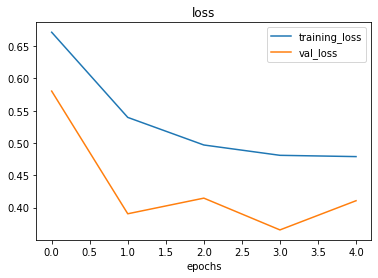

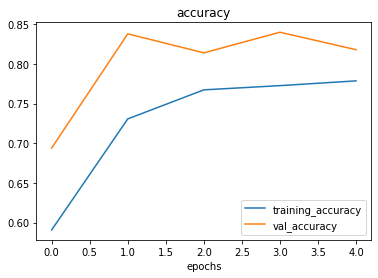

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_8 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape = (224,224,3)),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation = 'relu'),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = 'sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data_augmented_shuffeled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffeled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 119s 3s/step - loss: 0.6513 - accuracy: 0.6087 - val_loss: 0.6507 - val_accuracy: 0.5780
Epoch 2/10
47/47 [==============================] - 119s 3s/step - loss: 0.5805 - accuracy: 0.6933 - val_loss: 0.4441 - val_accuracy: 0.7940
Epoch 3/10
47/47 [==============================] - 119s 3s/step - loss: 0.5028 - accuracy: 0.7613 - val_loss: 0.3927 - val_accuracy: 0.8160
Epoch 4/10
47/47 [==============================] - 118s 3s/step - loss: 0.4963 - accuracy: 0.7727 - val_loss: 0.3601 - val_accuracy: 0.8540
Epoch 5/10
47/47 [==============================] - 118s 3s/step - loss: 0.4739 - accuracy: 0.7913 - val_loss: 0.3721 - val_accuracy: 0.8520
Epoch 6/10
47/47 [==============================] - 118s 3s/step - loss: 0.4670 - accuracy: 0.7780 - val_loss: 0.3191 - val_accuracy: 0.8660
Epoch 7/10
47/47 [==============================] - 118s 3s/step - loss: 0.4349 - accuracy: 0.8033 - val_loss: 0.2897 - val_accuracy: 0.8780
Epoch 8/10
47

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

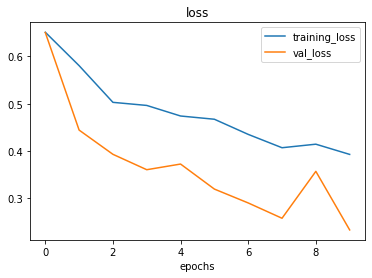

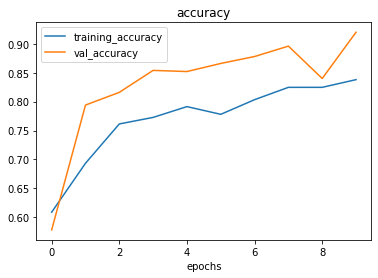

In [ ]:
plot_loss_curves(history_8)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U9')

--2021-07-29 10:40:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.1s    

2021-07-29 10:40:34 (17.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



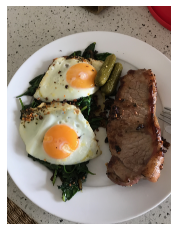

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);# to make prediction

In [25]:
def load_and_prep_images(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img,channels=3)
  img=tf.image.resize(img,size=[img_shape,img_shape])
  img = img/255
  img = tf.expand_dims(img,axis=0)
  return img


In [ ]:
steak = load_and_prep_images("03-steak.jpeg")
steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pred=model_8.predict(steak)

In [ ]:
class_names[int(tf.round(pred))]

'steak'

In [27]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_images(filename)
  pred = model.predict(img)
  if len(pred[0])  > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]
  plt.imshow(tf.squeeze(img)),
  plt.title(f"prediction: {pred_class}")
  plt.axis(False)
  plt.show()

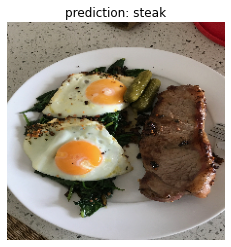

In [ ]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2021-07-29 10:40:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  18.1MB/s    in 0.2s    

2021-07-29 10:40:37 (18.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



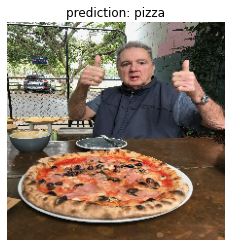

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

#multiclass_classification

    Become one with the data (visualize, visualize, visualize...)
    Preprocess the data (prepare it for a model)
    Create a model (start with a baseline)
    Fit the model
    Evaluate the model
    Adjust different parameters and improve model (try to beat your baseline)
    Repeat until satisfied


In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2021-07-29 22:39:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 173.194.192.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   167MB/s    in 3.0s    

2021-07-29 22:39:11 (167 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [7]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are{len(dirnames)} directories and {len(filenames) } images in {dirpath}")

there are2 directories and 0 images in 10_food_classes_all_data
there are10 directories and 0 images in 10_food_classes_all_data/test
there are0 directories and 250 images in 10_food_classes_all_data/test/hamburger
there are0 directories and 250 images in 10_food_classes_all_data/test/pizza
there are0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
there are0 directories and 250 images in 10_food_classes_all_data/test/ramen
there are0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
there are0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
there are0 directories and 250 images in 10_food_classes_all_data/test/sushi
there are0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
there are0 directories and 250 images in 10_food_classes_all_data/test/steak
there are0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
there are10 directories and 0 images in 10_food_classes_al

In [6]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


image shape: (384, 512, 3)


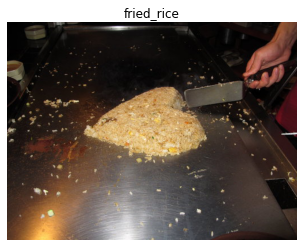

In [11]:
import random
img = view_random_image(target_dir = train_dir,
                                     target_class=random.choice(class_names))

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                             shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense 
 

model_9 = Sequential([
                      Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation='relu'),
                      Conv2D(10,3,activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation='softmax')
                      ])


In [ ]:
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 513s 2s/step - loss: 2.1912 - accuracy: 0.1945 - val_loss: 2.0563 - val_accuracy: 0.2456
Epoch 2/5
235/235 [==============================] - 508s 2s/step - loss: 1.9616 - accuracy: 0.3045 - val_loss: 1.9063 - val_accuracy: 0.3228
Epoch 3/5
235/235 [==============================] - 510s 2s/step - loss: 1.6868 - accuracy: 0.4217 - val_loss: 2.0042 - val_accuracy: 0.2892
Epoch 4/5
235/235 [==============================] - 510s 2s/step - loss: 1.2247 - accuracy: 0.5928 - val_loss: 2.2463 - val_accuracy: 0.2948
Epoch 5/5
235/235 [==============================] - 519s 2s/step - loss: 0.6235 - accuracy: 0.8012 - val_loss: 3.4657 - val_accuracy: 0.2664


In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 52s 662ms/step - loss: 3.4657 - accuracy: 0.2664


[3.4656851291656494, 0.266400009393692]

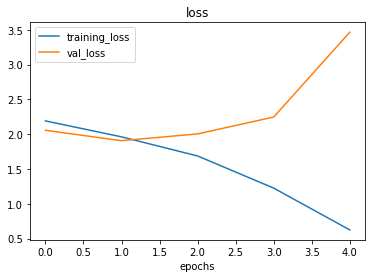

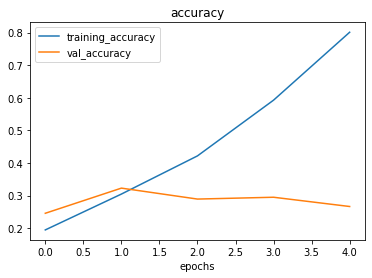

In [ ]:
plot_loss_curves(history_9)

In [15]:
#data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             width_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [ ]:
#clone model
model_10 = tf.keras.models.clone_model(model_9)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data)) 

Epoch 1/5
235/235 [==============================] - 585s 2s/step - loss: 2.1654 - accuracy: 0.1988 - val_loss: 2.0035 - val_accuracy: 0.2792
Epoch 2/5
235/235 [==============================] - 582s 2s/step - loss: 2.0402 - accuracy: 0.2715 - val_loss: 1.9464 - val_accuracy: 0.3156
Epoch 3/5
235/235 [==============================] - 581s 2s/step - loss: 1.9596 - accuracy: 0.3176 - val_loss: 1.8632 - val_accuracy: 0.3632
Epoch 4/5
235/235 [==============================] - 579s 2s/step - loss: 1.9218 - accuracy: 0.3389 - val_loss: 1.8419 - val_accuracy: 0.3788
Epoch 5/5
235/235 [==============================] - 579s 2s/step - loss: 1.8872 - accuracy: 0.3528 - val_loss: 1.8328 - val_accuracy: 0.3612


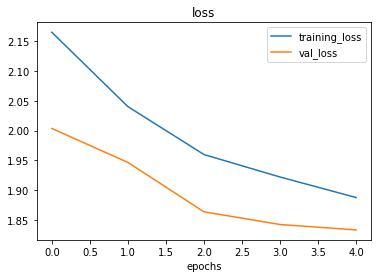

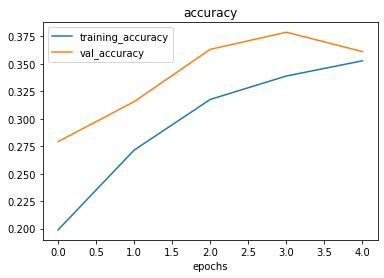

In [ ]:
plot_loss_curves(history_10)

In [ ]:
model_11 = tf.keras.models.clone_model(model_9)
initial_learning_rate = 0.1



model_11.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"]
                 )
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_11 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[lr_scheduler]) 

Epoch 1/5
235/235 [==============================] - 579s 2s/step - loss: 1.8166 - accuracy: 0.3773 - val_loss: 1.7349 - val_accuracy: 0.4044
Epoch 2/5
235/235 [==============================] - 580s 2s/step - loss: 1.8050 - accuracy: 0.3841 - val_loss: 1.7235 - val_accuracy: 0.4200
Epoch 3/5
235/235 [==============================] - 578s 2s/step - loss: 1.8030 - accuracy: 0.3885 - val_loss: 1.7173 - val_accuracy: 0.4204
Epoch 4/5
235/235 [==============================] - 581s 2s/step - loss: 1.7878 - accuracy: 0.3916 - val_loss: 1.7056 - val_accuracy: 0.4256
Epoch 5/5
235/235 [==============================] - 581s 2s/step - loss: 1.7902 - accuracy: 0.3901 - val_loss: 1.6991 - val_accuracy: 0.4284


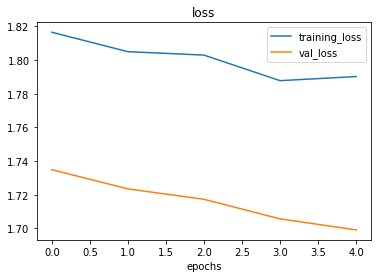

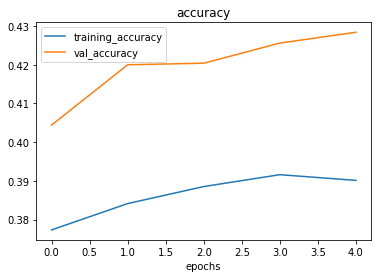

In [ ]:
plot_loss_curves(history_11)

In [ ]:
model11df=(pd.DataFrame(history_11.history))

In [ ]:
model11df

,loss,accuracy,val_loss,val_accuracy,lr
0,1.816575,0.377333,1.734891,0.4044,0.000100
1,1.805017,0.384133,1.723462,0.4200,0.000112
2,1.802995,0.388533,1.717278,0.4204,0.000126
3,1.787792,0.391600,1.705646,0.4256,0.000141
4,1.790238,0.390133,1.699075,0.4284,0.000158


In [17]:
lrs = 1e-4 *(10**(tf.range(5)/20))
plt.semilogx(lrs,model11df["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("loss vs learning rate")
plt.show()

NameError: ignored

In [ ]:
1.4*(10**-4)

0.00014

In [3]:
model_12 = Sequential([
                       Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
                       Conv2D(10,3,activation='relu'),
                       MaxPool2D(),
                       Conv2D(10,3,activation='relu'),
                       Conv2D(10,3,activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10,activation='softmax')
])

In [16]:
model_12.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0014),
                 metrics = ['accuracy'])
history_12=model_12.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 615s 3s/step - loss: 2.2043 - accuracy: 0.1835 - val_loss: 2.0661 - val_accuracy: 0.2488
Epoch 2/10
235/235 [==============================] - 609s 3s/step - loss: 2.0468 - accuracy: 0.2708 - val_loss: 1.8886 - val_accuracy: 0.3268
Epoch 3/10
235/235 [==============================] - 604s 3s/step - loss: 1.9456 - accuracy: 0.3192 - val_loss: 1.8475 - val_accuracy: 0.3568
Epoch 4/10
235/235 [==============================] - 600s 3s/step - loss: 1.9045 - accuracy: 0.3368 - val_loss: 1.7954 - val_accuracy: 0.3700
Epoch 5/10
235/235 [==============================] - 602s 3s/step - loss: 1.8718 - accuracy: 0.3513 - val_loss: 1.7642 - val_accuracy: 0.4060
Epoch 6/10
235/235 [==============================] - 599s 3s/step - loss: 1.8297 - accuracy: 0.3757 - val_loss: 1.7415 - val_accuracy: 0.4032
Epoch 7/10
235/235 [==============================] - 604s 3s/step - loss: 1.8240 - accuracy: 0.3733 - val_loss: 1.7040 - val_accuracy: 0.4304

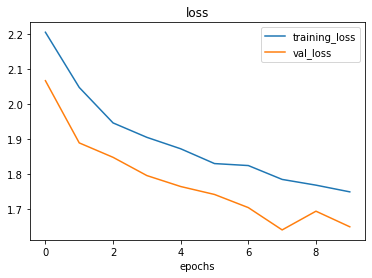

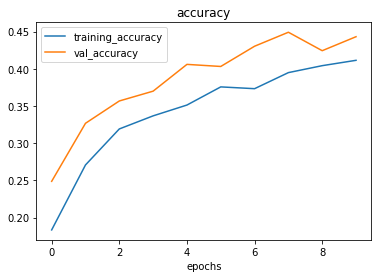

In [19]:
plot_loss_curves(history_12)

In [20]:
#pridictions
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [21]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

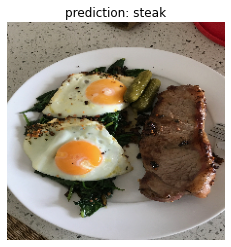

In [34]:
pred_and_plot(model=model_12, 
              filename="03-steak.jpeg", 
              class_names=class_names)

In [35]:
model_12.save("saved_trained_model_12")

INFO:tensorflow:Assets written to: saved_trained_model_12/assets


In [37]:
loaded_model_12 = tf.keras.models.load_model("saved_trained_model_12")

In [38]:
loaded_model_12.evaluate(test_data)

79/79 [==============================] - 54s 682ms/step - loss: 1.6493 - accuracy: 0.4432


[1.649309515953064, 0.4431999921798706]